# Implementation of Convolutional filter
#### Implementation of the convolutional filter in two ways - the usual and using the matrix representation
#### Author: Maria Zharova, zharova.ma@phystech.edu

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [10]:
''' The first method:
    manually sequentially combine the filter and part of the image 
    and calculate the value of the output pixel.
    Input: path to image and convolutional kernel.
    Output: returns numpy-image, it also is displayed and saved in the same folder. '''

def conv_func_1(img_path, conv_kernel_path):
    # reading files
    image = cv2.imread(img_path, 0)
    conv_kernel = np.loadtxt(conv_kernel_path)
    
    x_image, y_image = image.shape # x is counted vertically from top to bottom, y is counted horizontally from left to right
    x_conv_kernel, y_conv_kernel = conv_kernel.shape
    
    # check input data
    #raise base exception
    if (x_image < x_conv_kernel) or (y_image < y_conv_kernel):
        #print('Wrong size!')
        raise Exception('Wrong size!')
    
    # convolution application
    x_ans = x_image - x_conv_kernel + 1
    y_ans = y_image - y_conv_kernel + 1
    ans = np.zeros((x_ans, y_ans))
    for i in range(x_ans):
        for j in range(y_ans):
            A = image[i:i+x_conv_kernel, j:j+y_conv_kernel]
            ans[i][j] = np.sum(A*conv_kernel)
    
    # correcting non-existent values
    ans = np.where(ans < 0, 0, ans)
    ans = np.where(ans > 255, 255, ans)
    
    # save converted image
    plt.imshow(ans, cmap = 'gray')
    ans_path = img_path[:-4] + '_ans_method_1.png'
    cv2.imwrite(ans_path, image)
    
    return ans


In [11]:
pic1 = conv_func_1('./input/1/image.png','./input/1/conv_kernel.txt')

Exception: Wrong size!

In [21]:
''' The second method:
    implementing a convolutional filter using matrices.
    Input: the same.
    Output: the same.'''

def conv_func_2(img_path, conv_kernel_path):
    # reading files
    image = cv2.imread(img_path, 0)
    conv_kernel = np.loadtxt(conv_kernel_path)
    
    x_image, y_image = image.shape
    x_conv_kernel, y_conv_kernel = conv_kernel.shape
    
    # check input data
    if (x_image < x_conv_kernel) or (y_image < y_conv_kernel):
        print('Wrong size!')
        return
    
    # converting conv. kernel array to vector form
    new_conv_kernel = conv_kernel.ravel()
    
    # converting image-array to vector form
    strd0, strd1 = image.strides
    x_conv_kernel, y_conv_kernel = conv_kernel.shape
    rows = x_image - x_conv_kernel + 1
    columns = y_image - y_conv_kernel + 1
    
    new_img_shape = x_conv_kernel, y_conv_kernel, rows, columns
    #print(new_img_shape)
    new_img_strides = strd0, strd1, strd0, strd1
    #print(new_img_strides)
    new_image = np.lib.stride_tricks.as_strided(image, shape=new_img_shape, strides=new_img_strides)
    new_image = new_image.reshape(x_conv_kernel * y_conv_kernel, -1)[:,::] ###
    
    ans = np.dot(new_conv_kernel, new_image).reshape((rows, columns))
    # new_image.shape == (x_conv_kernel, y_image - y_conv_kernel + 1)
    # new_conv_kernel.shape == (1, x_conv_kernel*y_conv_kernel)
    
    minimum = ans.min()
    if minimum < 0:
        ans -= minimum
    maximum = ans.max()
    if maximum > 255:
        ans = ans / maximum * 255
    # correcting non-existent values
    #ans = np.where(ans < 0, , ans)
    #ans = np.where(ans > 255, 255, ans)
    
    # save converted image
    plt.imshow(ans, cmap = 'gray')
    ans_path = img_path[:-4] + '_ans_method_2.png'
    cv2.imwrite(ans_path, image)
    
    return ans
    

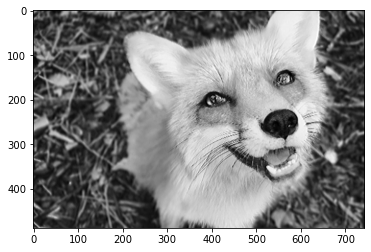

In [25]:
pic2 = conv_func_1('./input/6/image.png','./input/6/conv_kernel.txt')

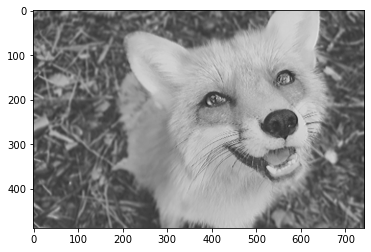

In [24]:
pic2 = conv_func_2('./input/6/image.png','./input/6/conv_kernel.txt') 

## Let's compare the CPU time for both methods:

2.45 s ± 493 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


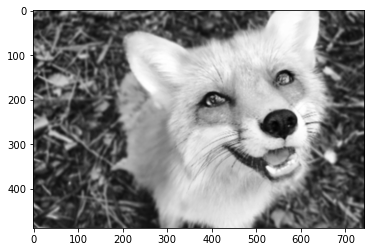

In [130]:
%%timeit
conv_func_1('./input/2/image.png','./input/2/conv_kernel.txt')

36.4 ms ± 3.58 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


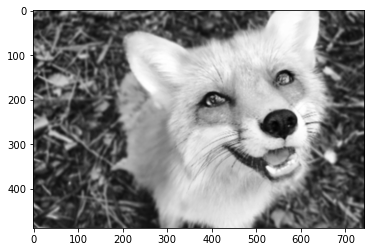

In [131]:
%%timeit
conv_func_2('./input/2/image.png','./input/2/conv_kernel.txt')

#### The second method using matrices is ~ 4 times faster!

## Let's compare the contents of arrays obtained in different ways:
Round both arrays, because the precision of float numbers may vary slightly 

In [132]:
(np.round(pic1, 2) == np.round(pic2, 2)).all()

True

Do ot for all pictures

True
True
True
True
True


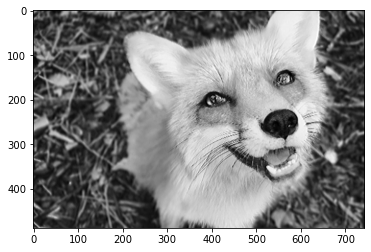

In [133]:
print((np.round(conv_func_1('./input/1/image.png','./input/1/conv_kernel.txt'), 2) == np.round(conv_func_2('./input/1/image.png','./input/1/conv_kernel.txt'), 2)).all())
print((np.round(conv_func_1('./input/3/image.png','./input/3/conv_kernel.txt'), 2) == np.round(conv_func_2('./input/3/image.png','./input/3/conv_kernel.txt'), 2)).all())
print((np.round(conv_func_1('./input/4/image.png','./input/4/conv_kernel.txt'), 2) == np.round(conv_func_2('./input/4/image.png','./input/4/conv_kernel.txt'), 2)).all())
print((np.round(conv_func_1('./input/5/image.png','./input/5/conv_kernel.txt'), 2) == np.round(conv_func_2('./input/5/image.png','./input/5/conv_kernel.txt'), 2)).all())
print((np.round(conv_func_1('./input/6/image.png','./input/6/conv_kernel.txt'), 2) == np.round(conv_func_2('./input/6/image.png','./input/6/conv_kernel.txt'), 2)).all())

All input images and numpy representations match!:)